In [3]:
import pandas as pd
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

In [59]:
data = pd.read_csv(r'C:\Users\Tamma\Desktop\PGD ML & AI\DataSets\AnalyticsVidyaHackathon\HealthCare Analytics II\Train_hMYJ020\train.csv')
test_data = pd.read_csv(r'C:\Users\Tamma\Desktop\PGD ML & AI\DataSets\AnalyticsVidyaHackathon\HealthCare Analytics II\Test_ND2Q3bm\test.csv')

In [5]:
print(data.shape)
print(test_data.shape)

(318438, 18)
(137057, 17)


In [6]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [7]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sizes = [data.Stay.value_counts()[0], data.Stay.value_counts()[1],data.Stay.value_counts()[2],data.Stay.value_counts()[3],data.Stay.value_counts()[4],data.Stay.value_counts()[5],data.Stay.value_counts()[6],data.Stay.value_counts()[7],data.Stay.value_counts()[8],data.Stay.value_counts()[9],data.Stay.value_counts()[10]]
label = ['21-30','11-20','31-40','51-60','0-10','41-50','71-80','More than 100 Days','81-90','91-100','61-70']
plt.pie(sizes,labels=label, shadow=True,explode=(0.07,0.03,0,0,0,0,0,0,0,0,0) ,autopct='%1.1f%%',colors=sb.color_palette("Set2"))
print('Classes Balances : \n',data.Stay.value_counts())

Classes Balances : 
 21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64


In [8]:
data.shape

(318438, 18)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
case_id                              318438 non-null int64
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null object
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null object
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null object
Ward_Type                            318438 non-null object
Ward_Facility_Code                   318438 non-null object
Bed Grade                            318325 non-null float64
patientid                            318438 non-null int64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null object
Severity of Illness                  318438 non-null object
Visitors with Patient                318438 non-null

In [10]:
data.isna().sum(axis=0)/len(data.index)

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed Grade                            0.000355
patientid                            0.000000
City_Code_Patient                    0.014232
Type of Admission                    0.000000
Severity of Illness                  0.000000
Visitors with Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay                                 0.000000
dtype: float64

In [11]:
#removing rows where 'Bed Grade' isn't given, there are only 3 types of Grade given to Bed, imputing with anyting may lead to wrong information of Bed in this case

data = data.loc[~data['Bed Grade'].isna()]

#removing rows where 'City_Code_Patient' is null
data = data.loc[~data['City_Code_Patient'].isna()]
print(data.shape)
data.head()

(313793, 18)


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [12]:
data.isna().sum(axis=0)/len(data.index)

case_id                              0.0
Hospital_code                        0.0
Hospital_type_code                   0.0
City_Code_Hospital                   0.0
Hospital_region_code                 0.0
Available Extra Rooms in Hospital    0.0
Department                           0.0
Ward_Type                            0.0
Ward_Facility_Code                   0.0
Bed Grade                            0.0
patientid                            0.0
City_Code_Patient                    0.0
Type of Admission                    0.0
Severity of Illness                  0.0
Visitors with Patient                0.0
Age                                  0.0
Admission_Deposit                    0.0
Stay                                 0.0
dtype: float64

In [13]:
# data['City_Code_Patient'].value_counts()
# # print(data.City_Code_Patient.dtype)

In [14]:
stay_map = {'0-10':'0','11-20':'1','21-30':'2','31-40':'3','41-50':'4','51-60':'5','61-70':'6','71-80':'7','81-90':'8','91-100':'9','More than 100 Days':'10'}
data.Stay = data.Stay.map(stay_map)

In [15]:
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,1
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,3
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,1
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,1


In [16]:
data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000
mean,158937.911120,18.326419,4.778169,3.196419,2.622952,65743.029382,7.252447,3.280857,4881.893165
std,91939.506976,8.633613,3.103237,1.167924,0.872618,37978.083237,4.745243,1.761758,1086.243945
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79271.000000,11.000000,2.000000,2.000000,2.000000,32833.000000,4.000000,2.000000,4188.000000
50%,158950.000000,19.000000,5.000000,3.000000,3.000000,65735.000000,8.000000,3.000000,4742.000000
75%,238399.000000,26.000000,7.000000,4.000000,3.000000,98472.000000,8.000000,4.000000,5410.000000
90%,286485.800000,28.000000,9.000000,4.000000,4.000000,118548.000000,12.000000,5.000000,6256.000000
95%,302498.400000,30.000000,11.000000,5.000000,4.000000,125107.000000,16.000000,6.000000,6926.000000
99%,315250.080000,32.000000,13.000000,7.000000,4.000000,130344.000000,25.000000,10.000000,8341.080000


outliers 

Available Extra Rooms in Hospital, Visitors with Patient

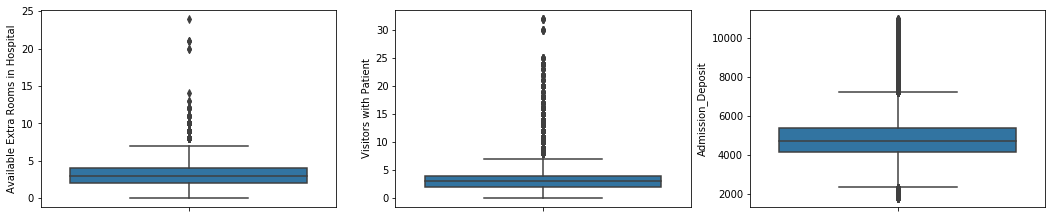

In [17]:
import numpy as np

plt.figure(figsize=(18,8))
plt.subplot(2,3,1)
sb.boxplot(y=data['Available Extra Rooms in Hospital'])
# plt.title('Available Extra Rooms in Hospital')

plt.subplot(2,3,2)
sb.boxplot(y=data['Visitors with Patient'])

plt.subplot(2,3,3)
sb.boxplot(y=data['Admission_Deposit'])

# data['Available Extra Rooms in Hospital'].dtype
# data['Available Extra Rooms in Hospital'].value_counts()

In [18]:
#Outliers Treatment

In [19]:
data['Available Extra Rooms in Hospital'] = data['Available Extra Rooms in Hospital'].apply(lambda x : 3 if x>9 else x)
data['Visitors with Patient'] = data['Visitors with Patient'].apply(lambda x : 7 if x>11 else x)

In [20]:
print(np.percentile(data['Visitors with Patient'],99))
print(data['Visitors with Patient'].value_counts())
# data.loc[data['Admission_Deposit']>11]


8.0
2     136680
4      78044
3      58259
6      18510
5       9028
8       4775
7       4473
9       1331
1       1189
10      1168
11       318
0         18
Name: Visitors with Patient, dtype: int64


In [21]:
# plt.figure(figsize=(10,10))
# sb.heatmap(data.corr(),annot=True)

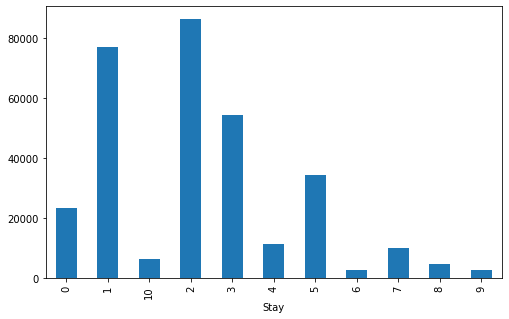

In [22]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
data.groupby('Stay').case_id.count().plot(kind='bar')


In [23]:
# data['Visitors with Patient'].value_counts()

### Data Preparation

In [24]:
# data[['Hospital_code','City_Code_Hospital','Bed Grade','City_Code_Patient']] = data[['Hospital_code','City_Code_Hospital','Bed Grade','City_Code_Patient']].astype('O') 

In [25]:
# data['Hospital_code'].dtype

In [26]:
# data.Hospital_code.dtype

In [27]:
def preprocess_pipe(data):
    for col in ['Hospital_code','Hospital_type_code','City_Code_Hospital','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Bed Grade','City_Code_Patient','Type of Admission','Severity of Illness']:
        data[col] = data[col].astype(str)
        
    dummies = pd.get_dummies(data[['Hospital_code','Hospital_type_code','City_Code_Hospital','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Bed Grade','City_Code_Patient','Type of Admission','Severity of Illness']])

    data = pd.concat([data,dummies],axis=1)
    print('Columns After Adding Dummies',data.shape)
    data.drop(columns = ['Hospital_code','Hospital_type_code','City_Code_Hospital','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Bed Grade','City_Code_Patient','Type of Admission','Severity of Illness'],inplace=True)
#     print('Columns After Removing Orginal Columns',data.shape)
    data.drop(['case_id','patientid'],axis=1,inplace=True)
    print('Columns After Removing Orginal Columns',data.shape)

    from sklearn.preprocessing import LabelEncoder

    lb = LabelEncoder()
    data['Age'] = lb.fit_transform(data.Age)
    return(data)


In [28]:
# data['Available Extra Rooms in Hospital'].dtype
data = preprocess_pipe(data)
data.head()

Columns After Adding Dummies (313793, 135)
Columns After Removing Orginal Columns (313793, 122)


,Available Extra Rooms in Hospital,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_code_1,Hospital_code_10,Hospital_code_11,Hospital_code_12,Hospital_code_13,Hospital_code_14,Hospital_code_15,Hospital_code_16,Hospital_code_17,Hospital_code_18,Hospital_code_19,Hospital_code_2,Hospital_code_20,Hospital_code_21,Hospital_code_22,Hospital_code_23,Hospital_code_24,Hospital_code_25,Hospital_code_26,Hospital_code_27,Hospital_code_28,Hospital_code_29,Hospital_code_3,Hospital_code_30,Hospital_code_31,Hospital_code_32,Hospital_code_4,Hospital_code_5,Hospital_code_6,Hospital_code_7,Hospital_code_8,Hospital_code_9,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,Hospital_type_code_f,Hospital_type_code_g,City_Code_Hospital_1,City_Code_Hospital_10,City_Code_Hospital_11,City_Code_Hospital_13,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_4,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_P,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Bed Grade_1.0,Bed Grade_2.0,Bed Grade_3.0,Bed Grade_4.0,City_Code_Patient_1.0,City_Code_Patient_10.0,City_Code_Patient_11.0,City_Code_Patient_12.0,City_Code_Patient_13.0,City_Code_Patient_14.0,City_Code_Patient_15.0,City_Code_Patient_16.0,City_Code_Patient_18.0,City_Code_Patient_19.0,City_Code_Patient_2.0,City_Code_Patient_20.0,City_Code_Patient_21.0,City_Code_Patient_22.0,City_Code_Patient_23.0,City_Code_Patient_24.0,City_Code_Patient_25.0,City_Code_Patient_26.0,City_Code_Patient_27.0,City_Code_Patient_28.0,City_Code_Patient_29.0,City_Code_Patient_3.0,City_Code_Patient_30.0,City_Code_Patient_31.0,City_Code_Patient_32.0,City_Code_Patient_33.0,City_Code_Patient_34.0,City_Code_Patient_35.0,City_Code_Patient_36.0,City_Code_Patient_37.0,City_Code_Patient_38.0,City_Code_Patient_4.0,City_Code_Patient_5.0,City_Code_Patient_6.0,City_Code_Patient_7.0,City_Code_Patient_8.0,City_Code_Patient_9.0,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate
0,3,2,5,4911.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,2,2,5,5954.0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,2,2,5,4745.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,2,2,5,7272.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,2,2,5,5558.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [30]:
y_train = data.pop('Stay')
X_train = data

In [31]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print("{} {}".format("Before handling class imbalance : ",counter))
# transform the dataset
oversample = SMOTE()
X_train_, y_train_ = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train_)
print("{} {}".format("After handling class imbalance : ",counter))

Using TensorFlow backend.


Before handling class imbalance :  Counter({'2': 86316, '1': 77095, '3': 54312, '5': 34463, '0': 23250, '4': 11541, '7': 10096, '10': 6548, '8': 4761, '9': 2713, '6': 2698})
After handling class imbalance :  Counter({'0': 86316, '4': 86316, '3': 86316, '1': 86316, '5': 86316, '2': 86316, '7': 86316, '10': 86316, '8': 86316, '6': 86316, '9': 86316})


In [32]:
print('X_train_ : ',X_train_.shape)
print('y_train_ : ',y_train_.shape)
X_train_.head()

X_train_ :  (949476, 121)
y_train_ :  (949476,)


,Available Extra Rooms in Hospital,Visitors with Patient,Age,Admission_Deposit,Hospital_code_1,Hospital_code_10,Hospital_code_11,Hospital_code_12,Hospital_code_13,Hospital_code_14,Hospital_code_15,Hospital_code_16,Hospital_code_17,Hospital_code_18,Hospital_code_19,Hospital_code_2,Hospital_code_20,Hospital_code_21,Hospital_code_22,Hospital_code_23,Hospital_code_24,Hospital_code_25,Hospital_code_26,Hospital_code_27,Hospital_code_28,Hospital_code_29,Hospital_code_3,Hospital_code_30,Hospital_code_31,Hospital_code_32,Hospital_code_4,Hospital_code_5,Hospital_code_6,Hospital_code_7,Hospital_code_8,Hospital_code_9,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,Hospital_type_code_f,Hospital_type_code_g,City_Code_Hospital_1,City_Code_Hospital_10,City_Code_Hospital_11,City_Code_Hospital_13,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_4,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_P,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Bed Grade_1.0,Bed Grade_2.0,Bed Grade_3.0,Bed Grade_4.0,City_Code_Patient_1.0,City_Code_Patient_10.0,City_Code_Patient_11.0,City_Code_Patient_12.0,City_Code_Patient_13.0,City_Code_Patient_14.0,City_Code_Patient_15.0,City_Code_Patient_16.0,City_Code_Patient_18.0,City_Code_Patient_19.0,City_Code_Patient_2.0,City_Code_Patient_20.0,City_Code_Patient_21.0,City_Code_Patient_22.0,City_Code_Patient_23.0,City_Code_Patient_24.0,City_Code_Patient_25.0,City_Code_Patient_26.0,City_Code_Patient_27.0,City_Code_Patient_28.0,City_Code_Patient_29.0,City_Code_Patient_3.0,City_Code_Patient_30.0,City_Code_Patient_31.0,City_Code_Patient_32.0,City_Code_Patient_33.0,City_Code_Patient_34.0,City_Code_Patient_35.0,City_Code_Patient_36.0,City_Code_Patient_37.0,City_Code_Patient_38.0,City_Code_Patient_4.0,City_Code_Patient_5.0,City_Code_Patient_6.0,City_Code_Patient_7.0,City_Code_Patient_8.0,City_Code_Patient_9.0,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate
0,3,2,5,4911.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,2,2,5,5954.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,2,2,5,4745.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,2,2,5,7272.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,2,2,5,5558.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [33]:
to_be_scaled = ['Available Extra Rooms in Hospital','Visitors with Patient','Age','Admission_Deposit']
scaler = MinMaxScaler()
X_train_[to_be_scaled] = scaler.fit_transform(X_train_[to_be_scaled])

In [34]:
X_train_.head(2)

,Available Extra Rooms in Hospital,Visitors with Patient,Age,Admission_Deposit,Hospital_code_1,Hospital_code_10,Hospital_code_11,Hospital_code_12,Hospital_code_13,Hospital_code_14,Hospital_code_15,Hospital_code_16,Hospital_code_17,Hospital_code_18,Hospital_code_19,Hospital_code_2,Hospital_code_20,Hospital_code_21,Hospital_code_22,Hospital_code_23,Hospital_code_24,Hospital_code_25,Hospital_code_26,Hospital_code_27,Hospital_code_28,Hospital_code_29,Hospital_code_3,Hospital_code_30,Hospital_code_31,Hospital_code_32,Hospital_code_4,Hospital_code_5,Hospital_code_6,Hospital_code_7,Hospital_code_8,Hospital_code_9,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,Hospital_type_code_f,Hospital_type_code_g,City_Code_Hospital_1,City_Code_Hospital_10,City_Code_Hospital_11,City_Code_Hospital_13,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_4,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_P,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Bed Grade_1.0,Bed Grade_2.0,Bed Grade_3.0,Bed Grade_4.0,City_Code_Patient_1.0,City_Code_Patient_10.0,City_Code_Patient_11.0,City_Code_Patient_12.0,City_Code_Patient_13.0,City_Code_Patient_14.0,City_Code_Patient_15.0,City_Code_Patient_16.0,City_Code_Patient_18.0,City_Code_Patient_19.0,City_Code_Patient_2.0,City_Code_Patient_20.0,City_Code_Patient_21.0,City_Code_Patient_22.0,City_Code_Patient_23.0,City_Code_Patient_24.0,City_Code_Patient_25.0,City_Code_Patient_26.0,City_Code_Patient_27.0,City_Code_Patient_28.0,City_Code_Patient_29.0,City_Code_Patient_3.0,City_Code_Patient_30.0,City_Code_Patient_31.0,City_Code_Patient_32.0,City_Code_Patient_33.0,City_Code_Patient_34.0,City_Code_Patient_35.0,City_Code_Patient_36.0,City_Code_Patient_37.0,City_Code_Patient_38.0,City_Code_Patient_4.0,City_Code_Patient_5.0,City_Code_Patient_6.0,City_Code_Patient_7.0,City_Code_Patient_8.0,City_Code_Patient_9.0,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate
0,0.333333,0.181818,0.555556,0.337858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0.222222,0.181818,0.555556,0.451129,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [40]:
pca = PCA(random_state=50)
pca.fit(X_train_)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
    svd_solver='auto', tol=0.0, whiten=False)

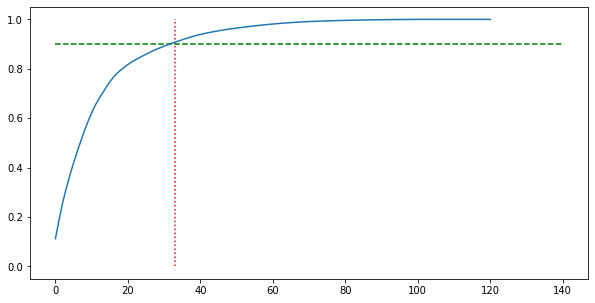

In [44]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,5))
plt.plot(var_cumu)
plt.hlines(y=.90,xmax=140,xmin=0,colors='g',linestyles='--')
plt.vlines(x=33,ymax=1.0,ymin=0,colors='r',linestyles='dotted')

In [36]:
pca_ = PCA(.90,random_state=100)
pca_.fit(X_train_)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
len(pca_.components_)

33

In [38]:
X_train_pca = pca_.fit_transform(X_train_)
X_train_pca

array([[-0.35575576,  0.57757991, -0.38474681, ...,  0.54309352,
        -0.63855358,  0.32071829],
       [-0.25293922,  1.1204319 ,  0.07482516, ...,  0.53883877,
        -0.50584767,  0.40347463],
       [-0.62731728,  0.22914218,  0.31475589, ...,  0.78276202,
        -0.60095892, -0.22429653],
       ...,
       [-0.21101014,  0.56763848, -0.08449555, ...,  0.00878061,
        -0.2327404 ,  0.11156832],
       [-0.10710322,  0.44537365,  0.00463152, ...,  0.01565411,
         0.0290352 ,  0.04587685],
       [-0.21457294,  0.67096543,  0.41498504, ...,  0.03271974,
         0.137381  ,  0.04169053]])

In [39]:
X_train_pca.shape

(949476, 33)

In [50]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train_pca,y_train_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_train_pred = lr.predict(X_train_pca)
print(classification_report(y_train_,y_train_pred))

              precision    recall  f1-score   support

           0       0.35      0.38      0.36     86316
           1       0.32      0.41      0.36     86316
          10       0.30      0.38      0.33     86316
           2       0.37      0.63      0.46     86316
           3       0.19      0.05      0.08     86316
           4       0.29      0.26      0.27     86316
           5       0.25      0.21      0.23     86316
           6       0.28      0.40      0.33     86316
           7       0.21      0.06      0.09     86316
           8       0.26      0.25      0.26     86316
           9       0.24      0.24      0.24     86316

    accuracy                           0.30    949476
   macro avg       0.28      0.30      0.27    949476
weighted avg       0.28      0.30      0.27    949476



In [55]:
rf = RandomForestClassifier(max_depth=10,n_jobs=-1,verbose=3)
rf.fit(X_train_pca,y_train_)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.6min


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100building tree 60 of 100

building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.0min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=3,
                       warm_start=False)

In [56]:
y_train_pred = rf.predict(X_train_pca)
print(classification_report(y_train_,y_train_pred))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   13.4s finished


              precision    recall  f1-score   support

           0       0.51      0.42      0.46     86316
           1       0.43      0.42      0.42     86316
          10       0.26      0.52      0.35     86316
           2       0.39      0.71      0.50     86316
           3       0.42      0.14      0.21     86316
           4       0.37      0.29      0.33     86316
           5       0.32      0.41      0.36     86316
           6       0.38      0.28      0.32     86316
           7       0.32      0.12      0.17     86316
           8       0.59      0.26      0.36     86316
           9       0.28      0.44      0.34     86316

    accuracy                           0.36    949476
   macro avg       0.39      0.36      0.35    949476
weighted avg       0.39      0.36      0.35    949476



In [49]:
#Let's tune RandomForest

In [23]:
hyper_params = { 'max_depth': range(5,12),
                 'min_samples_split': range(100,301,100),
                 'min_samples_leaf' : range(50,251,50)
}

rf = RandomForestClassifier(n_estimators=100, max_features='auto',n_jobs=-1)

grid_obj = GridSearchCV(estimator = rf,
             param_grid = hyper_params,
             scoring = 'accuracy',
             cv = 2,
             return_train_score=True,
             n_jobs = -1,
             verbose = 3
)

grid_obj.fit(X_train_pca,y_train_)

Fitting 2 folds for each of 105 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 421.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [34]:
df = pd.DataFrame(grid_obj.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,30.025498,0.095498,7.171003,0.002000,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.370683,0.371520,0.371101,0.000419,100,0.368365,0.380460,0.374412,0.006047
1,29.646502,0.135503,7.205489,0.003497,5,50,200,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.375820,0.367689,0.371755,0.004065,99,0.373464,0.375444,0.374454,0.000990
2,29.066013,0.119002,6.782486,0.014500,5,50,300,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.376712,0.367116,0.371914,0.004798,98,0.373891,0.375488,0.374690,0.000799
3,28.758993,0.001014,6.834992,0.048996,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.374258,0.372183,0.373221,0.001038,95,0.371322,0.381250,0.376286,0.004964
4,29.208509,0.049504,6.817998,0.001009,5,100,200,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.370523,0.377173,0.373848,0.003325,93,0.368371,0.385597,0.376984,0.008613


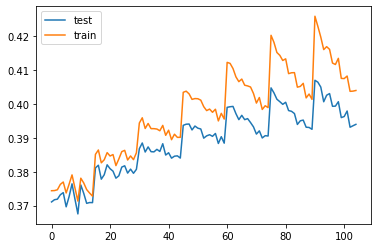

In [45]:
plt.plot(df.index,df.mean_test_score)
plt.plot(df.index,df.mean_train_score)
plt.legend(['test','train'])

In [46]:
grid_obj.best_params_

{'max_depth': 11, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [69]:
rf  = RandomForestClassifier(max_depth=12,
                             min_samples_split=100,
                             min_samples_leaf=50,
                             n_estimators=100,
                             max_features='auto',
                             n_jobs=-1
                             )
rf.fit(X_train_pca,y_train_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [70]:
y_train_pred = rf.predict(X_train_pca)
print(classification_report(y_train_,y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.08      0.14     86316
           1       0.64      0.01      0.03     86316
           2       0.66      0.02      0.03     86316
           3       0.64      0.01      0.02     86316
           4       0.00      0.00      0.00     86316
           5       0.79      0.00      0.00     86316
           6       0.74      0.01      0.01     86316
           7       0.00      0.00      0.00     86316
           8       0.78      0.16      0.27     86316
           9       0.00      0.00      0.00     86316
          10       0.83      0.01      0.01     86316

   micro avg       0.77      0.03      0.05    949476
   macro avg       0.54      0.03      0.05    949476
weighted avg       0.54      0.03      0.05    949476
 samples avg       0.03      0.03      0.03    949476



In [73]:
accuracy_score(y_train_,y_train_pred)

0.02640509080798251

In [77]:
y_train_.shape

(949476, 11)

In [44]:
xgb = XGBClassifier(learning_rate=0.1,n_jobs=-1)
xgb.fit(X_train_pca,y_train_)
# XGBClassifier?

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
y_train_pred = xgb.predict(X_train_pca)
print(classification_report(y_train_,y_train_pred))

              precision    recall  f1-score   support

           0       0.41      0.44      0.42     86316
           1       0.38      0.41      0.40     86316
          10       0.28      0.44      0.34     86316
           2       0.38      0.61      0.47     86316
           3       0.28      0.13      0.18     86316
           4       0.33      0.26      0.29     86316
           5       0.32      0.34      0.33     86316
           6       0.30      0.34      0.32     86316
           7       0.26      0.13      0.17     86316
           8       0.41      0.29      0.34     86316
           9       0.29      0.30      0.29     86316

    accuracy                           0.34    949476
   macro avg       0.33      0.34      0.32    949476
weighted avg       0.33      0.34      0.32    949476



In [58]:
#Let's tune XgBoost

In [ ]:
hyper_param = {'max_depth' : [3,4,5],
               'learning_rate' : [0.01,0.1,0.2,0.3,0.4],
                'subsample' : [0.7,1]}

xgb = XGBClassifier()

grid_xgb = GridSearchCV(estimator=xgb,
                        param_grid=hyper_param,
                        scoring='accuracy',
                        cv=2,
                        return_train_score=True,
                        n_jobs=-1,
                        verbose=2
                       )

grid_xgb.fit(X_train_pca,y_train_)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [24]:
df_2 = pd.DataFrame(grid_xgb.cv_results_)
df_2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,574.207997,0.149002,16.222998,0.069002,0.01,3,0.7,"{'learning_rate': 0.01, 'max_depth': 3, 'subsa...",0.377228,0.378576,0.377902,0.000674,29,0.374471,0.391760,0.383116,0.008645
1,504.285003,0.646999,14.920495,0.074497,0.01,3,1,"{'learning_rate': 0.01, 'max_depth': 3, 'subsa...",0.377095,0.378563,0.377829,0.000734,30,0.374101,0.392283,0.383192,0.009091
2,776.451020,3.782022,29.082481,0.002520,0.01,4,0.7,"{'learning_rate': 0.01, 'max_depth': 4, 'subsa...",0.396853,0.389073,0.392963,0.003890,27,0.391603,0.405412,0.398508,0.006905
3,655.835001,0.684999,26.307500,0.325499,0.01,4,1,"{'learning_rate': 0.01, 'max_depth': 4, 'subsa...",0.396464,0.388544,0.392504,0.003960,28,0.391661,0.404603,0.398132,0.006471
4,918.544990,3.053992,41.954505,0.179505,0.01,5,0.7,"{'learning_rate': 0.01, 'max_depth': 5, 'subsa...",0.405954,0.395396,0.400675,0.005279,25,0.401279,0.414125,0.407702,0.006423


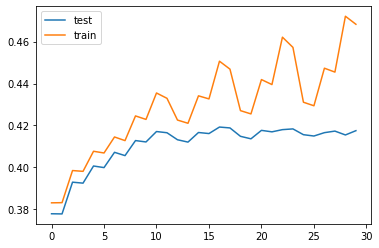

In [26]:
plt.plot(df_2.index,df.mean_test_score)
plt.plot(df_2.index,df.mean_train_score)
plt.legend(['test','train'])

In [27]:
grid_xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.7}

In [ ]:
xgb = XGBClassifier(n_estimators=200,
                    learning_rate=0.2,
                    max_depth=5,
                    subsample=0.7,
                    n_jobs=-1,
                    verbosity=3
                    )

xgb.fit(X_train_pca,y_train_)

In [32]:
y_train_pred = xgb.predict(X_train_pca)
print(classification_report(y_train_,y_train_pred))

              precision    recall  f1-score   support

           0       0.46      0.19      0.27     23250
           1       0.45      0.53      0.49     77095
          10       0.64      0.50      0.56      6548
           2       0.44      0.68      0.54     86316
           3       0.47      0.24      0.32     54312
           4       0.75      0.01      0.03     11541
           5       0.44      0.54      0.49     34463
           6       0.88      0.03      0.06      2698
           7       0.69      0.06      0.11     10096
           8       0.55      0.35      0.43      4761
           9       0.84      0.08      0.15      2713

    accuracy                           0.45    313793
   macro avg       0.60      0.29      0.31    313793
weighted avg       0.48      0.45      0.42    313793



In [59]:
X_train_pca.shape

(949476, 33)

In [25]:
print(y_train.shape)
y_train

(313793,)


0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 313793, dtype: object

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
import keras

In [42]:
y_train_k = keras.utils.to_categorical(y_train_)
print(y_train_k.shape)
y_train_k

(949476, 11)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [58]:
model = Sequential()
model.add(Dense(70,input_dim=33, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(70, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(70, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(70, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(70, activation='relu'))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(30, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(11, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_pca, y_train_k, epochs=20, batch_size=100)

Epoch 1/20
949476/949476 [==============================] - 34s 36us/step - loss: 1.7342 - acc: 0.3478
Epoch 2/20
949476/949476 [==============================] - 29s 31us/step - loss: 1.6525 - acc: 0.3786
Epoch 3/20
949476/949476 [==============================] - 29s 31us/step - loss: 1.6284 - acc: 0.3867
Epoch 4/20
949476/949476 [==============================] - 29s 31us/step - loss: 1.6139 - acc: 0.3925
Epoch 5/20
949476/949476 [==============================] - 29s 31us/step - loss: 1.6024 - acc: 0.3969
Epoch 6/20
949476/949476 [==============================] - 29s 31us/step - loss: 1.5926 - acc: 0.4004
Epoch 7/20
949476/949476 [==============================] - 29s 31us/step - loss: 1.5840 - acc: 0.4038
Epoch 8/20
949476/949476 [==============================] - 29s 31us/step - loss: 1.5769 - acc: 0.4070
Epoch 9/20
949476/949476 [==============================] - 30s 31us/step - loss: 1.5715 - acc: 0.4095
Epoch 10/20
949476/949476 [==============================] - 31s 32us/ste

In [161]:
# X_train.T.shape

In [162]:
# model.predict_classes(X_train_pca)

Best Model we got is ANN 


## Test Data

In [60]:

len(data.columns)

# len(X_test.columns)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
case_id                              137057 non-null int64
Hospital_code                        137057 non-null int64
Hospital_type_code                   137057 non-null object
City_Code_Hospital                   137057 non-null int64
Hospital_region_code                 137057 non-null object
Available Extra Rooms in Hospital    137057 non-null int64
Department                           137057 non-null object
Ward_Type                            137057 non-null object
Ward_Facility_Code                   137057 non-null object
Bed Grade                            137022 non-null float64
patientid                            137057 non-null int64
City_Code_Patient                    134900 non-null float64
Type of Admission                    137057 non-null object
Severity of Illness                  137057 non-null object
Visitors with Patient                137057 non-null

In [61]:
test_data.isna().sum(axis=0)/len(test_data.index)

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed Grade                            0.000255
patientid                            0.000000
City_Code_Patient                    0.015738
Type of Admission                    0.000000
Severity of Illness                  0.000000
Visitors with Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
dtype: float64

In [62]:
test_data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,137057.000000,137057.000000,137057.000000,137057.000000,137022.000000,137057.000000,134900.000000,137057.000000,137057.000000
mean,386967.000000,18.343747,4.758692,3.192686,2.634489,65877.903515,7.243996,3.284531,4869.731097
std,39565.092259,8.634694,3.102245,1.164250,0.869295,37942.997623,4.790625,1.777270,1080.766723
min,318439.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1800.000000
25%,352703.000000,11.000000,2.000000,2.000000,2.000000,32945.000000,4.000000,2.000000,4178.000000
50%,386967.000000,19.000000,5.000000,3.000000,3.000000,65786.000000,8.000000,3.000000,4731.000000
75%,421231.000000,26.000000,7.000000,4.000000,3.000000,98851.000000,8.000000,4.000000,5398.000000
max,455495.000000,32.000000,13.000000,21.000000,4.000000,131618.000000,38.000000,32.000000,11920.000000


In [63]:
#removing rows where 'Bed Grade' isn't given, there are only 3 types of Grade given to Bed, imputing with anyting may lead to wrong information of Bed in this case

test_data['Bed Grade'] = test_data['Bed Grade'].fillna(3)

test_data['City_Code_Patient'] = test_data['City_Code_Patient'].fillna(4)

print(test_data.shape)
# data.head()

X_test = preprocess_pipe(test_data)
print(X_test.shape)
X_test.head()

#scaler
X_test[to_be_scaled] = scaler.transform(X_test[to_be_scaled])
#pca transformation
X_test_pca = pca_.transform(X_test)
# X_test_pca

(137057, 17)
Columns After Adding Dummies (137057, 134)
Columns After Removing Orginal Columns (137057, 121)
(137057, 121)


In [64]:
X_test_pca.shape

(137057, 33)

In [65]:
# for col in X_test.columns:
#     if col not in data.columns:
#         print(col)

In [66]:
y_pred_test = model.predict_classes(X_test_pca)
test_data['Stay'] = list(y_pred_test)

In [67]:
len(X_test_pca) #949476
len(test_data.index)

137057

In [68]:
test_data = test_data[['case_id','Stay']]
test_data.head()

,case_id,Stay
0,318439,2
1,318440,5
2,318441,2
3,318442,2
4,318443,5


In [69]:
test_data.Stay.value_counts()

2     56178
1     42666
3     16920
5     15814
10     2227
0      1913
8       802
7       249
4       147
9       103
6        38
Name: Stay, dtype: int64

In [70]:
stay_map = {'0':'0-10','1':'11-20','2':'21-30','3':'31-40','4':'41-50','5':'51-60','6':'61-70','7':'71-80','8':'81-90','9':'91-100','10':'More than 100 Days'}

test_data.Stay = test_data.Stay.astype(str).replace(stay_map)

In [71]:
test_data.to_csv('final.csv',index=False)

In [72]:
test_data.head(10)

,case_id,Stay
0,318439,21-30
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
5,318444,21-30
6,318445,21-30
7,318446,11-20
8,318447,21-30
9,318448,21-30


In [61]:
test_data.Stay.dtype

dtype('O')